In [0]:
import numpy as np
import warnings
import pandas as pd
import math
from pandas import read_csv,DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

dataframe = read_csv('LBMP_14_15.csv',header=None)#hour_data

 

In [0]:
dataframe = dataframe[1:][1]
dataset = dataframe.copy(deep=True)

In [0]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [0]:
#def train_test(dataset, look_back):
dataset = dataframe[1:]
look_back=12
dataset=dataset.values
dataset = dataset.reshape(-1,1)
print(dataset.shape)
dataset=dataset.astype('float32')
scaler=StandardScaler(copy=True,with_mean=True,with_std=True)
dataset=scaler.fit_transform(dataset)
train,test=dataset[:8760:],dataset[8760:,:]
#reshape into X=t,Y=t+1,X
#look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
print('befor:', trainX.shape)
#print(len(testY))
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
print('after reshape:', trainX.shape)
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))


(17519, 1)
befor: (8748, 12)
after reshape: (8748, 12, 1)


In [0]:
dataframe[8755:8760]

8756    51.37
8757     49.3
8758     43.5
8759    41.48
8760    43.05
Name: 1, dtype: object

In [0]:
trainX, trainY, testX, testY = trainX, trainY, testX, testY

In [0]:
import numpy as np
import warnings
import pandas as pd
import math
from pandas import read_csv,DataFrame
from keras.models import Sequential
from keras.layers import Dense,LSTM,MaxPooling1D,Dropout,AveragePooling1D
from keras.layers.convolutional import Conv1D
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import time

epoch=16
LR=0.0005

model=Sequential()
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',input_shape=(None,1)))#,input_shape=(None,1)
#model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Conv1D(filters=64,kernel_size=3,padding='valid',activation='relu'))
model.add(LSTM(units=100, return_sequences=False))
#model.add(LSTM(units=100, recurrent_dropout=0.1,return_sequences=True))
#model.add(LSTM(units=80,return_sequences=False))
model.add(Dropout(0.1))
# linear activation: a(x) = x
model.add(Dense(activation='linear', units=1)) 

# compile the model
rmsprop = optimizers.RMSprop(LR)
model.compile(loss="mse", optimizer=rmsprop)

#global_start_time = time.time()   
#print('Training duration (s) : ', time.time() - global_start_time)

    #trainPredict = model.predict(trainX)
    
#return test_rmse,testPredict,testY,history,mape,test_mae

In [0]:
def plt_result(y_test,predicted_values):
    fig = plt.figure()
    plt.plot(y_test, 'o-')
    plt.plot(predicted_values[1:], 'o-')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(['True', 'Predict'], loc='upper left')
    plt.show()

In [0]:
def MAPE(predict,true):
    L1=int(true.shape[0])
    L2=int(predict.shape[0])
    #print(L1,   L2)
    if L1==L2:
        #SUM1=sum(abs(true-predict)/abs(true))
        SUM=0.0
        for i in range(L1-1):
            SUM=(abs(true[i]-predict[i+1])/true[i])+SUM
        per_SUM=SUM*100.0
        mape=per_SUM/L1
        return mape
    else:
        print("error")

In [0]:
history=model.fit(trainX,trainY,epochs=epoch,batch_size=64,validation_split=0.05,verbose=1)

Train on 8310 samples, validate on 438 samples
Epoch 1/16
8310/8310 [==============================] - 5s 553us/step - loss: 0.1850 - val_loss: 0.0100
Epoch 2/16
8310/8310 [==============================] - 3s 301us/step - loss: 0.0741 - val_loss: 0.0093
Epoch 3/16
8310/8310 [==============================] - 3s 303us/step - loss: 0.0661 - val_loss: 0.0065
Epoch 4/16
8310/8310 [==============================] - 3s 306us/step - loss: 0.0586 - val_loss: 0.0062
Epoch 5/16
8310/8310 [==============================] - 3s 306us/step - loss: 0.0542 - val_loss: 0.0094
Epoch 6/16
8310/8310 [==============================] - 3s 317us/step - loss: 0.0545 - val_loss: 0.0055
Epoch 7/16
8310/8310 [==============================] - 3s 320us/step - loss: 0.0539 - val_loss: 0.0051
Epoch 8/16
8310/8310 [==============================] - 3s 326us/step - loss: 0.0535 - val_loss: 0.0053
Epoch 9/16
8310/8310 [==============================] - 3s 320us/step - loss: 0.0495 - val_loss: 0.0051
Epoch 10/16
8310/

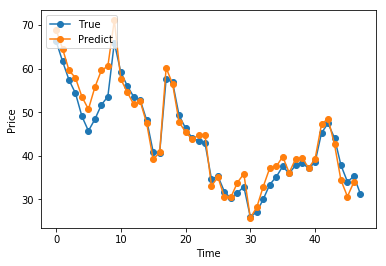

RMSE: 6.808256454998684
MAPE: [4.788414]
MAE: 4.4134054


In [0]:
#scaler=StandardScaler(copy=True,with_mean=True,with_std=True)
np.random.seed(7)
#test_rmse, predicted_values, y_test, history, mape,MAE=LSTM_model(dataframe,)
#Test_start = time.time()
i = 875
j = 923
#print(testX.shape)
testPredict = model.predict(testX[i:j])
#print('Testing duration (s) : ', time.time() - Test_start)  

testPredict = scaler.inverse_transform(testPredict)
#print(testPredict)
#print(testY.shape)
test_Y = scaler.inverse_transform([testY[i:j]])
test_Y=np.reshape(test_Y,(-1,1))    
#print(testY)
test_rmse = math.sqrt( mean_squared_error(test_Y[:,0], testPredict[:, 0]))
test_mae=mean_absolute_error(test_Y[:,0], testPredict[:, 0])

mape=MAPE(testPredict,test_Y[:]) 
plt_result(test_Y,testPredict)

 
print('RMSE:',test_rmse)
print('MAPE:',mape)
print('MAE:',test_mae)